# Record, Save and Play Moves on Poppy Ergo Jr

This notebook intends to show you how to:

* **record** movements using physical demonstrations,
* **replay** those movements and sequence them,
* **save** them to the hard drive and reload them.

An illustration can be seen in the following video:

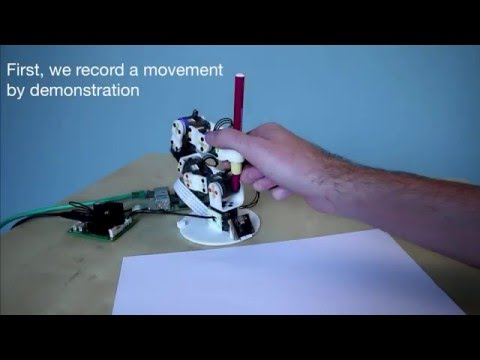

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('DJHOopBgPqs')

You will need a working and correctly setup Poppy Ergo Jr to follow this notebook. 

As we will use physical demonstration, you can not use a simulated robot. Yet the same methods could be used on simulation if you are using other kind of demonstration (e.g. programatically).

In [ ]:
# Import some matplolib and numpy shortcuts for Jupyter notebook
%matplotlib inline
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

## Connect to your Poppy Ergo Jr

Using the usual Python code:

In [ ]:
from pypot.creatures import PoppyErgoJr

poppy = PoppyErgoJr()

We then put it in its rest position. We will use it as our working base:

In [ ]:
poppy.rest_posture.start()

## Record movements

First, we need to import the *MoveRecorder* object that can be used to record any movements on a Poppy robot. It works with all robots including the Poppy Ergo Jr.

In [ ]:
from pypot.primitive.move import MoveRecorder

To create this recorder we need some extra information:
* on which **robot** to record the movements
* at which **frequency** the positions need to be retrieved (50Hz is a good default values)
* which **motors** are we actually recording (you can record a movement on a subpart of your robot)

In [ ]:
recorder = MoveRecorder(poppy, 50, poppy.tip)

As you can see we used the motor group *poppy.tip* as the list of motors to be recorded. It is equivalent to use the list of motors *[poppy.m4, poppy.m5, poppy.m6]*.

In [ ]:
poppy.tip == [poppy.m4, poppy.m5, poppy.m6]

Before actually recording a movement, we need to set the used motors compliant so they can be freely moved:

In [ ]:
for m in poppy.tip:
    m.compliant = True

Now the tip of the Poppy Ergo Jr should be free while the base is still stiff.

**Even if the motors are free, they can still be used as sensor**. This means that you can record their present position even if you make them move by hand.

The recorder can be start and stop when you want. In the interval the positions of every selected motors will be recorded at the predefined frequency.

So, prepare yourself to record your cool move! To start the record:

In [ ]:
recorder.start()

Now move the robot! When you are done, you can stop the record:

In [ ]:
recorder.stop()

The move you just recorded can be accessed via:

In [ ]:
recorder.move

You can get the number of key frames that have been recorded:

In [ ]:
print('{} key frames have been recorded.'.format(len(recorder.move.positions())))

Let's store this move in a variable (we copy it to not erase it when we will do another record):

In [ ]:
from copy import deepcopy

my_first_move = deepcopy(recorder.move)

You can also plot a move to see what it looks like:

In [ ]:
ax = axes()
my_first_move.plot(ax)

Now, let's record another move. This time we will record for 10 seconds and on the whole robot. You can easily do that using the following code:

First we recreate a recorder object with all motors. We also turn all motors compliant:

In [ ]:
recorder = MoveRecorder(poppy, 50, poppy.motors)

for m in poppy.motors:
    m.compliant = True

And then record for 10 seconds:

In [ ]:
import time

recorder.start()
time.sleep(10)
recorder.stop()

Now that the record is done, we also store it:

In [ ]:
my_second_move = deepcopy(recorder.move)

## Play recorded moves

First, we put back the robot in its rest position to avoid sudden movement:

In [ ]:
poppy.rest_posture.start()

Replaying move is really similar. First you need to create the *MovePlayer* object:

In [ ]:
from pypot.primitive.move import MovePlayer

It requires:
* the **robot** which will play the move
* the **move** to play

For instance, if we want to replay the first move we recorded:

In [ ]:
player = MovePlayer(poppy, my_first_move)

And to play it:

In [ ]:
player.start()

Once it's done, you can use the same code for the other move:

In [ ]:
player = MovePlayer(poppy, my_second_move)
player.start()

You can sequence moves by using the *wait_to_stop* method that will wait for the end of a move: 

In [ ]:
for move in [my_first_move, my_second_move]:
    player = MovePlayer(poppy, move)
    
    player.start()
    player.wait_to_stop()

Those movements can also be played in parallel. You will have to make sure that the movements can be combined otherwise pypot will simply add the different motor positions, possibly resulting in some unexpected moves. To avoid this problem make sure the moves you record are working on different sub sets of motors.

## Save/Load moves

To keep the moves you have recorded from one session to the other, the best solution is to store them on the hard drive of your robot. This can be done using the *save* method of a move:

In [ ]:
with open('my-first-demo.move', 'w') as f:
    my_first_move.save(f)

If you look at the file, you will see a list (possibly quite long) of "positions". These positions are basically:
* a **timestamp** (time in seconds since the beginning of the move)
* the list of motors name with:
    * the **present position**
    * the **present speed**

Here are the first 20 lines of the first move we recorded:

In [ ]:
!head -n 20 my-first-demo.move

This representation can be really heavy and quite cumbersome to work with. We plan to use a better representation in a future, such as one based on parametrized curve. **Contributions on this topic are welcomed!**

A move can be loaded from the disk using the opposite *load* method. It requires to import the *Move* object:

In [ ]:
from pypot.primitive.move import Move

with open('my-first-demo.move') as f:
    my_loaded_move = Move.load(f)

## Using demonstration in artistic context

Now you have all the tools needed to create choregraphies with Poppy Ergo Jr. To get inspiration, you can have a look at the amazing work of Thomas Peyruse with Poppy Humanoid: https://forum.poppy-project.org/t/danse-contemporaine-school-of-moon/1567

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('https://youtu.be/Hy56H2AZ_XI?list=PLdX8RO6QsgB6YCzezJHoYuRToFOhYk3Sf')

Or the *ENTRE NOUS* project of Emmanuelle Grangier: https://forum.poppy-project.org/t/projet-entre-nous-performance-choregraphique-et-sonore/1714

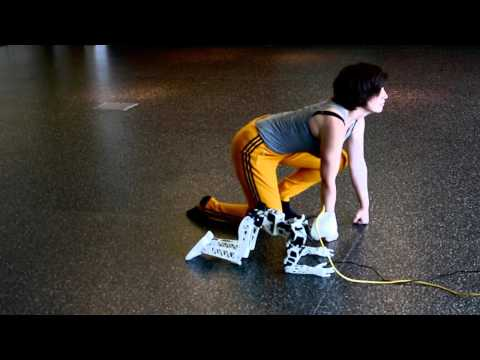

In [3]:
from IPython.display import YouTubeVideo

YouTubeVideo('hEBdz97FhS8')